In [1]:
#import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
# load preprocessed data
train_data=pd.read_csv("E:\\10xAccademy_Practice\Week 3\\Week 3 Challenge\\Sales Data Prediction\\Data\\rossmann-store-sales\\processed_TrainingData.csv")
test_data=pd.read_csv("E:\\10xAccademy_Practice\Week 3\\Week 3 Challenge\\Sales Data Prediction\\Data\\rossmann-store-sales\\Processed_TestData.csv")

C:\Users\HB\AppData\Local\Temp\ipykernel_11364\126732874.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data=pd.read_csv("E:\\10xAccademy_Practice\Week 3\\Week 3 Challenge\\Sales Data Prediction\\Data\\rossmann-store-sales\\processed_TrainingData.csv")
C:\Users\HB\AppData\Local\Temp\ipykernel_11364\126732874.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data=pd.read_csv("E:\\10xAccademy_Practice\Week 3\\Week 3 Challenge\\Sales Data Prediction\\Data\\rossmann-store-sales\\Processed_TestData.csv")


In [3]:
train_data.head(5)

Unnamed: 0        Date  Store  DayOfWeek    Sales  Open  Promo  \
0           0  2015-07-31      1          4   5263.0     1      1   
1           1  2015-07-31      2          4   6064.0     1      1   
2           2  2015-07-31      3          4   8314.0     1      1   
3           3  2015-07-31      4          4  13995.0     1      1   
4           4  2015-07-31      5          4   4822.0     1      1   

  StateHoliday  SchoolHoliday  CompetitionDistance  ...  month  Month  Year  \
0            0              1               1270.0  ...      7      7  2015   
1            0              1                570.0  ...      7      7  2015   
2            0              1              14130.0  ...      7      7  2015   
3            0              1                620.0  ...      7      7  2015   
4            0              1              29910.0  ...      7      7  2015   

   Day  weekday  weekofyear  weekend  PromoInterval  Assortment  StoreType  
0   31        4          31        0              1           0          2  
1   31        4          31        0              1           0          0  
2   31        4          31        0              1           0          0  
3   31        4          31        0              1           2          2  
4   31        4          31        0              1           0          0  

[5 rows x 25 columns]

In [4]:
test_data.head(5)

Unnamed: 0        Date  Id  Store  DayOfWeek  Open  Promo StateHoliday  \
0           0  2015-09-17   1      1          3   1.0      1            0   
1           1  2015-09-17   2      3          3   1.0      1            0   
2           2  2015-09-17   3      7          3   1.0      1            0   
3           3  2015-09-17   4      8          3   1.0      1            0   
4           4  2015-09-17   5      9          3   1.0      1            0   

   SchoolHoliday StoreType  ... Promo2  Promo2SinceWeek  Promo2SinceYear  \
0              0         c  ...      0             22.0           2012.0   
1              0         a  ...      1             14.0           2011.0   
2              0         a  ...      0             22.0           2012.0   
3              0         a  ...      0             22.0           2012.0   
4              0         a  ...      0             22.0           2012.0   

     PromoInterval  Year  Month  Day weekday  weekofyear  weekend  
0  Jan,Apr,Jul,Oct  2015      9   17       3          38        0  
1  Jan,Apr,Jul,Oct  2015      9   17       3          38        0  
2  Jan,Apr,Jul,Oct  2015      9   17       3          38        0  
3  Jan,Apr,Jul,Oct  2015      9   17       3          38        0  
4  Jan,Apr,Jul,Oct  2015      9   17       3          38        0  

[5 rows x 24 columns]

In [5]:
train_data.isnull().sum()

Unnamed: 0                   0
Date                         0
Store                        0
DayOfWeek                    0
Sales                        0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
month                        0
Month                        0
Year                         0
Day                          0
weekday                      0
weekofyear                   0
weekend                      0
PromoInterval                0
Assortment                   0
StoreType                    0
dtype: int64

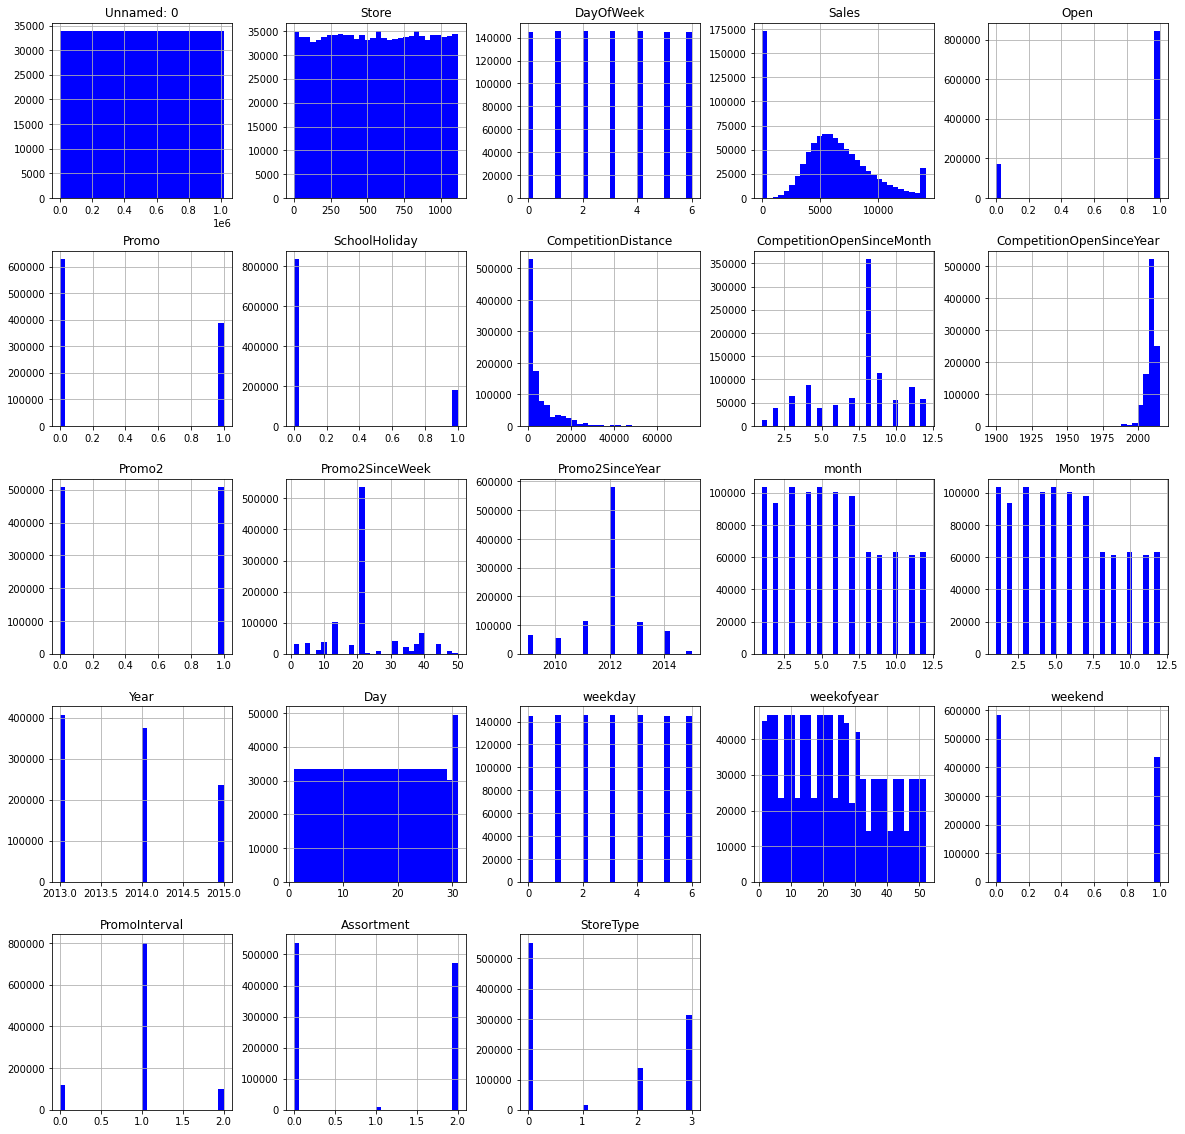

In [6]:
train_data.hist(bins = 30, figsize = (20, 20), color = 'b');

In [7]:
train_data.sort_values(["Store","Date"], ignore_index=True, inplace=True)
test_data.sort_values(["Store","Date"], ignore_index=True, inplace=True)

In [8]:
test_data.head()

Unnamed: 0        Date     Id  Store  DayOfWeek  Open  Promo StateHoliday  \
0       40232  2015-08-01  40233      1          5   1.0      0            0   
1       39376  2015-08-02  39377      1          6   0.0      0            0   
2       38520  2015-08-03  38521      1          0   1.0      1            0   
3       37664  2015-08-04  37665      1          1   1.0      1            0   
4       36808  2015-08-05  36809      1          2   1.0      1            0   

   SchoolHoliday StoreType  ... Promo2  Promo2SinceWeek  Promo2SinceYear  \
0              1         c  ...      0             22.0           2012.0   
1              1         c  ...      0             22.0           2012.0   
2              1         c  ...      0             22.0           2012.0   
3              1         c  ...      0             22.0           2012.0   
4              1         c  ...      0             22.0           2012.0   

     PromoInterval  Year  Month  Day weekday  weekofyear  weekend  
0  Jan,Apr,Jul,Oct  2015      8    1       5          31        1  
1  Jan,Apr,Jul,Oct  2015      8    2       6          31        1  
2  Jan,Apr,Jul,Oct  2015      8    3       0          32        1  
3  Jan,Apr,Jul,Oct  2015      8    4       1          32        0  
4  Jan,Apr,Jul,Oct  2015      8    5       2          32        0  

[5 rows x 24 columns]

In [9]:
test_data.tail()

Unnamed: 0        Date    Id  Store  DayOfWeek  Open  Promo  \
41083        4279  2015-09-13  4280   1115          6   0.0      0   
41084        3423  2015-09-14  3424   1115          0   1.0      1   
41085        2567  2015-09-15  2568   1115          1   1.0      1   
41086        1711  2015-09-16  1712   1115          2   1.0      1   
41087         855  2015-09-17   856   1115          3   1.0      1   

      StateHoliday  SchoolHoliday StoreType  ... Promo2  Promo2SinceWeek  \
41083            0              0         d  ...      1             22.0   
41084            0              0         d  ...      1             22.0   
41085            0              0         d  ...      1             22.0   
41086            0              0         d  ...      1             22.0   
41087            0              0         d  ...      1             22.0   

       Promo2SinceYear     PromoInterval  Year  Month  Day weekday  \
41083           2012.0  Mar,Jun,Sept,Dec  2015      9   13       6   
41084           2012.0  Mar,Jun,Sept,Dec  2015      9   14       0   
41085           2012.0  Mar,Jun,Sept,Dec  2015      9   15       1   
41086           2012.0  Mar,Jun,Sept,Dec  2015      9   16       2   
41087           2012.0  Mar,Jun,Sept,Dec  2015      9   17       3   

       weekofyear  weekend  
41083          37        1  
41084          38        1  
41085          38        0  
41086          38        0  
41087          38        0  

[5 rows x 24 columns]

In [10]:
#Make Date column the index
train_data.set_index('Date', inplace=True)
test_data.set_index('Date', inplace=True)

In [11]:
test_data.head()

Unnamed: 0     Id  Store  DayOfWeek  Open  Promo StateHoliday  \
Date                                                                        
2015-08-01       40232  40233      1          5   1.0      0            0   
2015-08-02       39376  39377      1          6   0.0      0            0   
2015-08-03       38520  38521      1          0   1.0      1            0   
2015-08-04       37664  37665      1          1   1.0      1            0   
2015-08-05       36808  36809      1          2   1.0      1            0   

            SchoolHoliday StoreType Assortment  ...  Promo2  Promo2SinceWeek  \
Date                                            ...                            
2015-08-01              1         c          a  ...       0             22.0   
2015-08-02              1         c          a  ...       0             22.0   
2015-08-03              1         c          a  ...       0             22.0   
2015-08-04              1         c          a  ...       0             22.0   
2015-08-05              1         c          a  ...       0             22.0   

            Promo2SinceYear    PromoInterval  Year  Month Day  weekday  \
Date                                                                     
2015-08-01           2012.0  Jan,Apr,Jul,Oct  2015      8   1        5   
2015-08-02           2012.0  Jan,Apr,Jul,Oct  2015      8   2        6   
2015-08-03           2012.0  Jan,Apr,Jul,Oct  2015      8   3        0   
2015-08-04           2012.0  Jan,Apr,Jul,Oct  2015      8   4        1   
2015-08-05           2012.0  Jan,Apr,Jul,Oct  2015      8   5        2   

            weekofyear  weekend  
Date                             
2015-08-01          31        1  
2015-08-02          31        1  
2015-08-03          32        1  
2015-08-04          32        0  
2015-08-05          32        0  

[5 rows x 23 columns]

In [12]:
train_data.head()

Unnamed: 0  Store  DayOfWeek   Sales  Open  Promo StateHoliday  \
Date                                                                         
2013-01-01     1016095      1          1     0.0     0      0            a   
2013-01-02     1014980      1          2  5530.0     1      0            0   
2013-01-03     1013865      1          3  4327.0     1      0            0   
2013-01-04     1012750      1          4  4486.0     1      0            0   
2013-01-05     1011635      1          5  4997.0     1      0            0   

            SchoolHoliday  CompetitionDistance  CompetitionOpenSinceMonth  \
Date                                                                        
2013-01-01              1               1270.0                        9.0   
2013-01-02              1               1270.0                        9.0   
2013-01-03              1               1270.0                        9.0   
2013-01-04              1               1270.0                        9.0   
2013-01-05              1               1270.0                        9.0   

            ...  month  Month  Year  Day  weekday  weekofyear  weekend  \
Date        ...                                                          
2013-01-01  ...      1      1  2013    1        1           1        0   
2013-01-02  ...      1      1  2013    2        2           1        0   
2013-01-03  ...      1      1  2013    3        3           1        0   
2013-01-04  ...      1      1  2013    4        4           1        0   
2013-01-05  ...      1      1  2013    5        5           1        1   

            PromoInterval  Assortment  StoreType  
Date                                              
2013-01-01              1           0          2  
2013-01-02              1           0          2  
2013-01-03              1           0          2  
2013-01-04              1           0          2  
2013-01-05              1           0          2  

[5 rows x 24 columns]

In [13]:
train_data.shape

(1017209, 24)

In [14]:
train_data.columns.tolist()

['Unnamed: 0',
 'Store',
 'DayOfWeek',
 'Sales',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'month',
 'Month',
 'Year',
 'Day',
 'weekday',
 'weekofyear',
 'weekend',
 'PromoInterval',
 'Assortment',
 'StoreType']

In [15]:
test_data.shape

(41088, 23)

In [16]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('E:\\10xAccademy_Practice\\Week 3\\Week 3 Challenge\\Sales Data Prediction\\Data_preparation')))
"""
Import required Data processing scripts
"""

from Data_Loader import Data_Loader 
from Preprocess_Working_Data import Data_Preprocessing
from Make_Plots import Make_Plots

In [17]:
DL=Data_Loader()
dp=Data_Preprocessing()
mp=Make_Plots()

# Distribution of Promotion in Training and testing Data

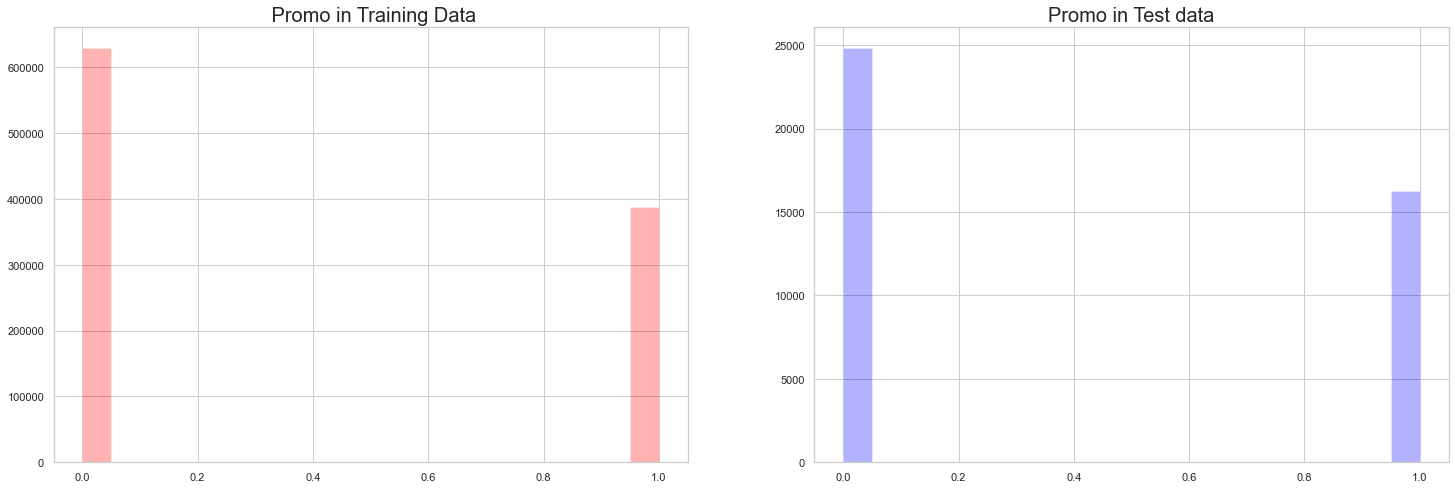

In [18]:
mp.plot_subplots(train_data['Promo'], test_data['Promo'], ' Promo in Training Data', 'Promo in Test data')

<AxesSubplot:xlabel='Year', ylabel='Sales'>

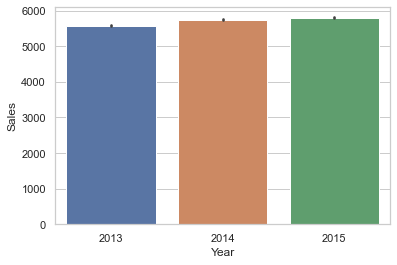

In [19]:
sns.barplot(data=train_data, x="Year", y="Sales")

# Sales Distribution during holiday 

<AxesSubplot:xlabel='StateHoliday', ylabel='Sales'>

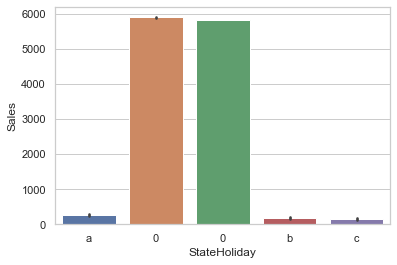

In [20]:
sns.barplot(data=train_data, x="StateHoliday", y="Sales")

In [31]:
#sns.lineplot(data=train_data, x="StateHoliday", y="Sales")

axis = train_data.groupby('StateHoliday')[['Sales']].mean()
fig = px.line(axis, x = axis.index, y = 'Sales', title = 'Average sales per StateHoliday', markers = True)
fig.show()

# From the above plot, it can be generalized that during holiday, sales amount is rapidly decreasing but there is large sale amount during non-holiday seasons


<AxesSubplot:xlabel='SchoolHoliday', ylabel='Sales'>

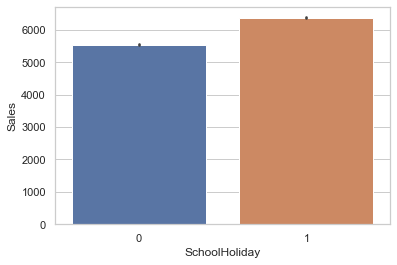

In [22]:
sns.barplot(data=train_data, x="SchoolHoliday", y="Sales")

<AxesSubplot:xlabel='SchoolHoliday', ylabel='Sales'>

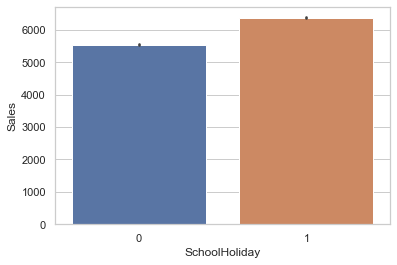

In [23]:
sns.barplot(data=train_data, x="SchoolHoliday", y="Sales")

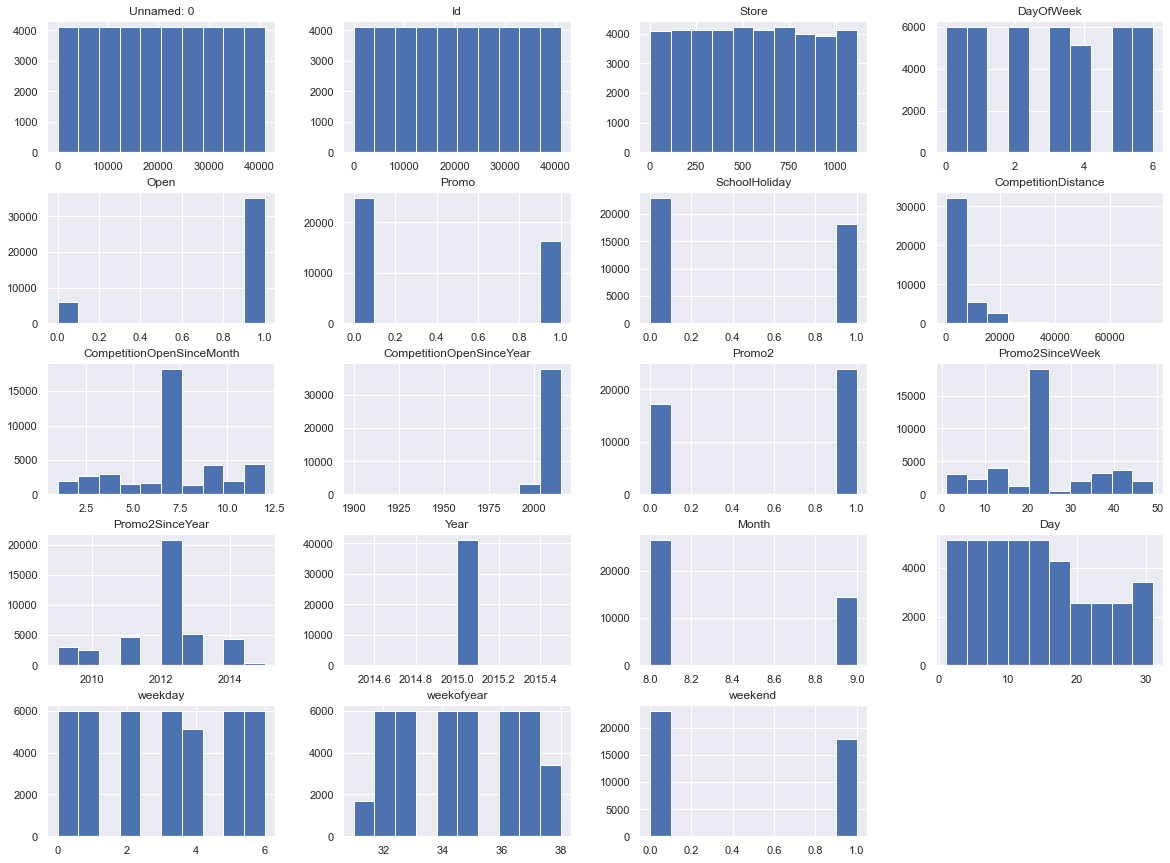

In [24]:
mp.plot_hist_muli(test_data)

c:\users\hb\appdata\local\programs\python\python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



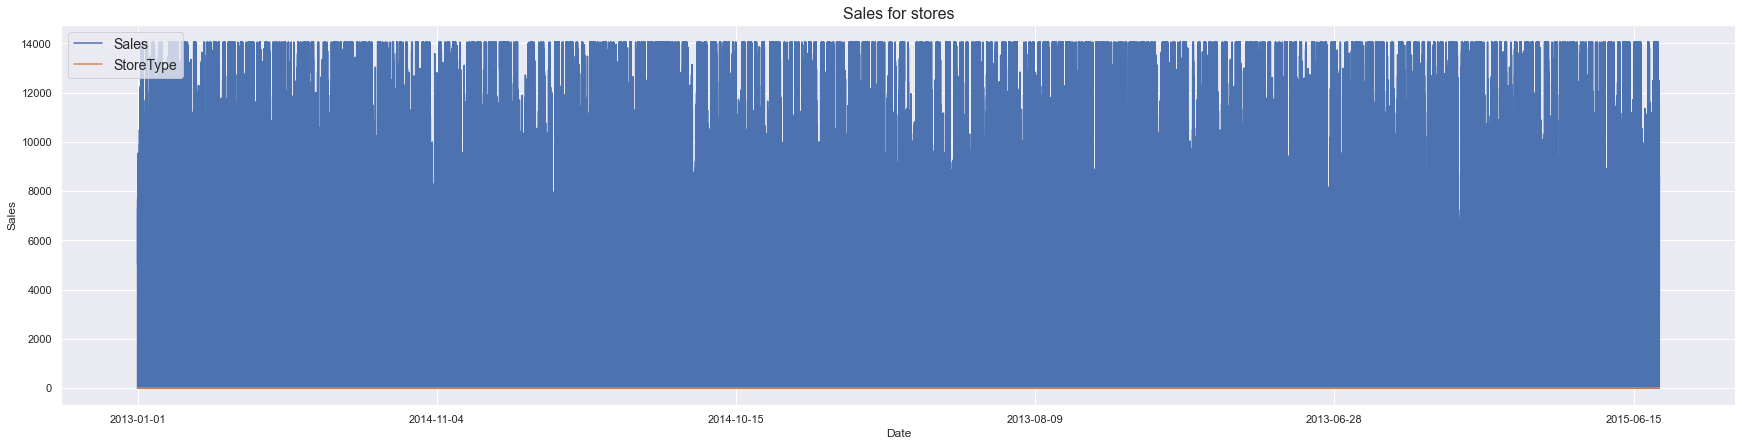

In [32]:
sns.set()
train_data[['Sales', 'StoreType']].plot(figsize=(30, 7))
plt.ylabel("Sales")
plt.title("Sales for stores", fontsize=16)
plt.legend(fontsize=14);

In [33]:
# Check & compare sales behavior before, during and after holidays
holiday_data = train_data.groupby(['StateHoliday'])['Sales'].mean().reset_index()
holiday_data.head()

StateHoliday        Sales
0            0  5820.086435
1            0  5890.889165
2            a   266.167053
3            b   181.978700
4            c   151.922073

In [34]:
holiday_data.replace({'StateHoliday': {'0': 'No Holiday', 'a': 'Public Holiday', 'b': 'Easter Holiday', 'c': 'Christmas'}}, inplace=True)

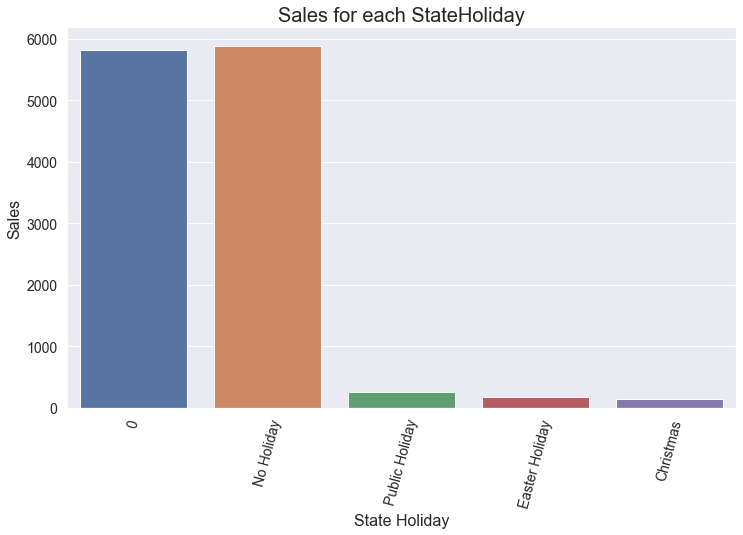

In [35]:
mp.plot_bar(holiday_data, 'StateHoliday', 'Sales', 'Sales for each StateHoliday', 'State Holiday', 'Sales')

In [ ]:
# As shown in the Bargraph, there is low sales amount during oliday

# sales pattern during School holiday

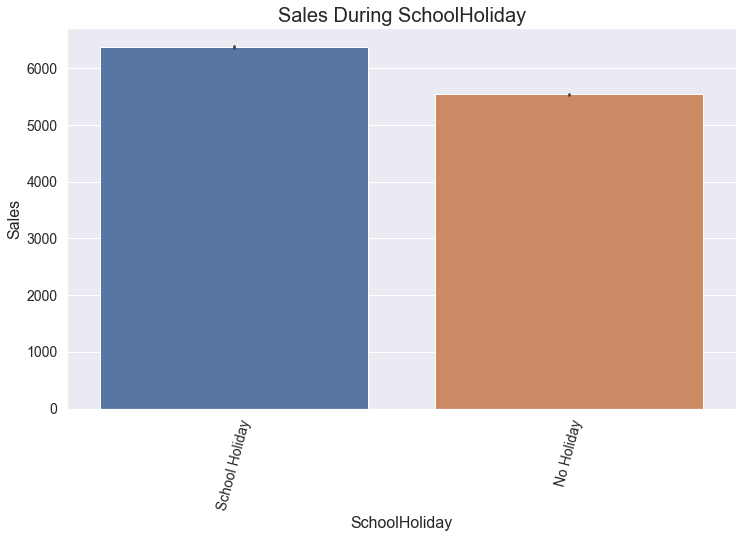

In [37]:
mp.plot_bar(train_data.replace({'SchoolHoliday': {0: 'No Holiday', 1: 'School Holiday'}}), 'SchoolHoliday', 'Sales', 'Sales During SchoolHoliday', 'SchoolHoliday', 'Sales')

In [41]:
year = train_data.groupby(['Year'])['Sales'].mean().reset_index()
year.head()

Year        Sales
0  2013  5574.871585
1  2014  5747.628450
2  2015  5800.567059

<AxesSubplot:xlabel='Year', ylabel='Sales'>

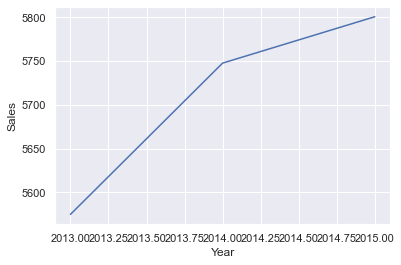

In [42]:
# Observe the Sale Trend using line plot
sns.lineplot(x='Year', y='Sales', data=year)

# The trend shown above is that at each year sales Amount increases from year to year

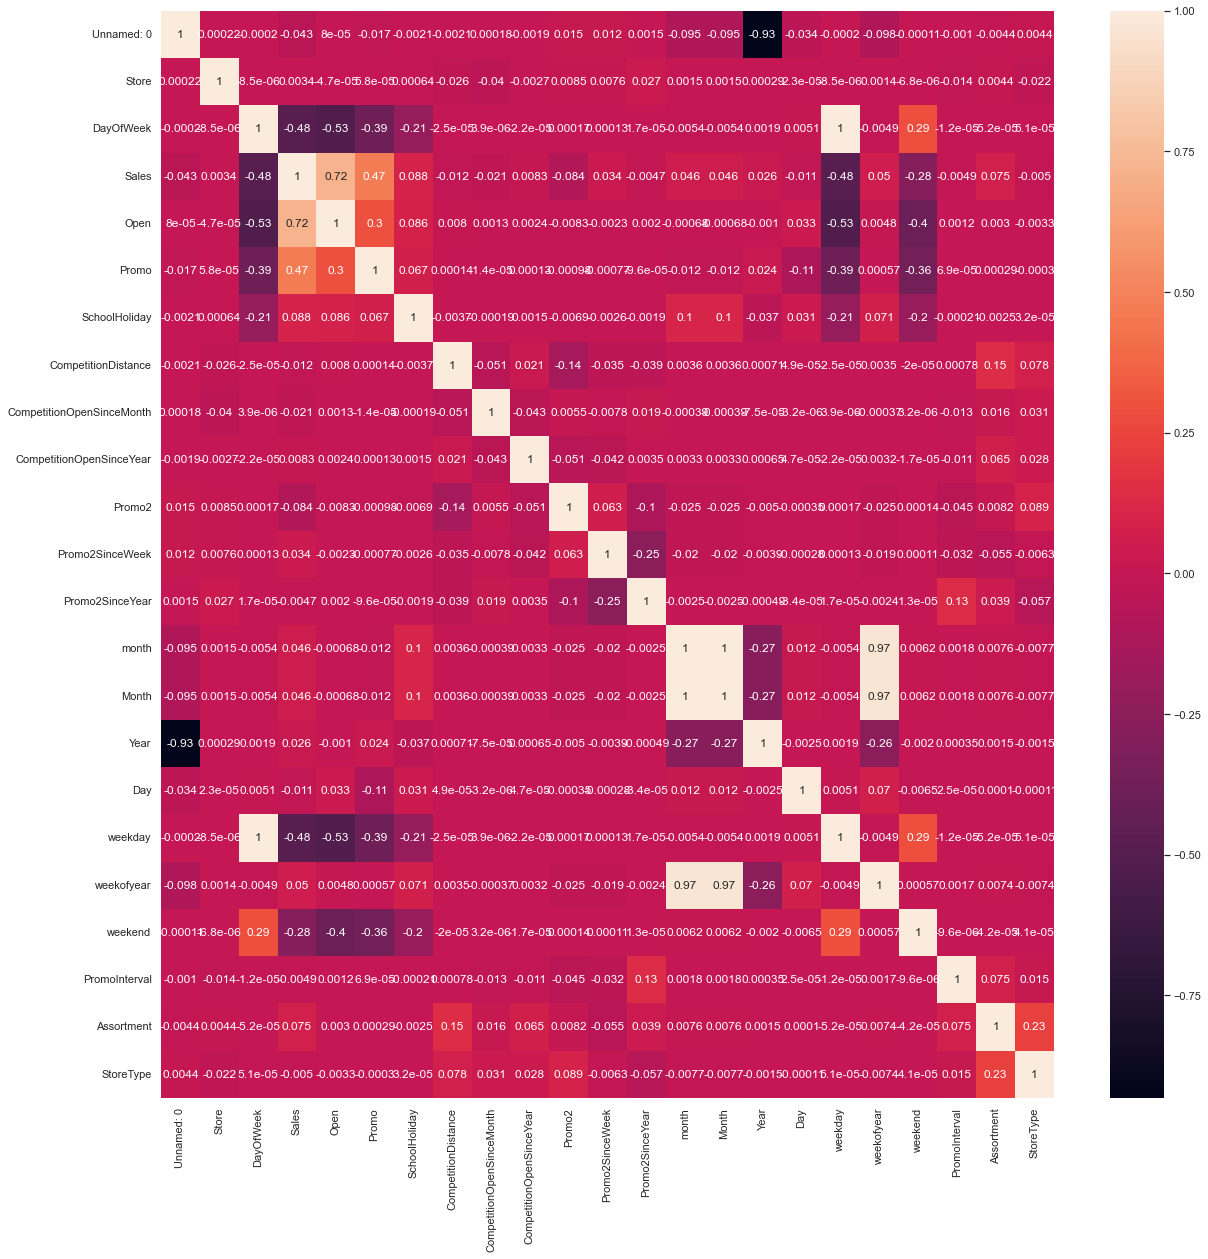

In [25]:
correlations = train_data.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True);

# Find correlation

In [26]:
#Observe the correlation between sales and other attributes
# if there is positive correlation, sales will decrease when other attributes are increased
#For example, the more promotions, the more sales, and the more competitors, the less sales.


In [27]:
import plotly.express as px

axis = train_data.groupby('Month')[['Sales']].mean()
fig = px.line(axis, x = axis.index, y = 'Sales', title = 'Average sales per month', markers = True)
fig.show()

In [28]:
axis = train_data.groupby('Day')[['Sales']].mean()
fig = px.line(axis, x = axis.index, y = 'Sales', title = 'Average sales per day', markers = True)
fig.show()

In [29]:
axis = train_data.groupby('Day')[['Customers']].mean()
fig = px.line(axis, x = axis.index, y = 'Customers', title = 'Average customers per day', markers = True)
fig.show()

KeyError: "Columns not found: 'Customers'"

In [30]:
axis = train_data.groupby('DayOfWeek')[['Sales']].mean()
fig = px.line(axis, x = axis.index, y = 'Sales', title = 'Average sales per day of the week', markers = True)
fig.show()

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
train_data.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax)

In [ ]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Open',hue='DayOfWeek', data=train_data,palette="husl", ax=axis1)

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='DayOfWeek', y='Sales', data=train_data, order=[1,2,3,4,5,6,7], ax=axis1)
sns.barplot(x='DayOfWeek', y='Customers', data=train_data, order=[1,2,3,4,5,6,7], ax=axis2)

In [ ]:
# From the above graph, it is shown that type a and b stores have the highest sales

In [ ]:
sns.barplot(x = 'Promo', y = 'Sales', data = train_data).set_title('Sales vs promotion')


In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,4))

axis1.title.set_text('Promo vs.Sales')
#axis2.title.set_text('Promo vs.Customers')
sns.barplot(x='Promo', y='Sales', data=train_data, ax=axis1)
#sns.barplot(x='Promo', y='Customers', data=train, ax=axis2)

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='StateHoliday', y='Sales', data= train_data, ax=axis1)

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='StoreType', y='Sales', data= train_data, ax=axis1)

In [ ]:
# Sales per Year
train_data.boxplot(column='Sales', by='Year',)
plt.show()

In [ ]:

sns.barplot(data=train_data, x="Year", y="Sales")



In [ ]:
#Sales per months
train_data.boxplot(column='Sales', by='Month',)
plt.show()

In [ ]:
sns.barplot(data=train_data, x="Month", y="Sales")


In [ ]:
sns.barplot(x = 'Promo', y = 'Customers', data = sales_train_all_df).set_title('Customers with promotion')
